In [4]:
import numpy as np
import pandas as pd

### **Data Ingestion**

In [5]:
df = pd.read_csv(r"D:\Downloads\diamond.csv")

In [6]:
df

id  carat        cut color clarity  depth  table     x     y   
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  \
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.05  13387  
2       3.50   2772  
3       2.71    666  
4       4.77  14453  
...      ...    ...  
193568  2.67   1130  
193569  3.47   2874  
193570  3.62   3036  
193571  2.81    681  
193572  3.48   2258  

[193573 rows x 11 columns]

### **Exploratory Data Analsis**

In [7]:
df.shape

(193573, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [10]:
df.sample(5)

id  carat      cut color clarity  depth  table     x     y     z   
161250  161250   1.06    Ideal     I     VS2   59.7   57.0  6.64  6.68  3.99  \
108620  108620   0.91     Good     I     SI1   63.9   60.0  6.10  6.13  3.91   
99631    99631   0.30    Ideal     G    VVS2   62.3   56.0  4.27  4.31  2.67   
104895  104895   2.01  Premium     I     SI1   62.4   58.0  8.01  7.96  4.94   
154371  154371   0.40  Premium     E     SI1   62.2   57.0  4.78  4.75  2.96   

        price  
161250   4634  
108620   3459  
99631     795  
104895  14715  
154371    975

In [11]:
df.tail()

id  carat        cut color clarity  depth  table     x     y   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  \
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
193568  2.67   1130  
193569  3.47   2874  
193570  3.62   3036  
193571  2.81    681  
193572  3.48   2258

In [12]:
df.duplicated().sum()

0

### **Seperate Numerical & Categorical Features**

In [13]:
numerical_features = df.columns[df.dtypes != 'object']
categorical_features = df.columns[df.dtypes == 'object']

In [14]:
print(f"Numerical Features is : {numerical_features}")
print(f"Categorical Features is : {categorical_features}")

Numerical Features is : Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Features is : Index(['cut', 'color', 'clarity'], dtype='object')


In [15]:
df[numerical_features].describe()

id          carat          depth          table   
count  193573.000000  193573.000000  193573.000000  193573.000000  \
mean    96786.000000       0.790688      61.820574      57.227675   
std     55879.856166       0.462688       1.081704       1.918844   
min         0.000000       0.200000      52.100000      49.000000   
25%     48393.000000       0.400000      61.300000      56.000000   
50%     96786.000000       0.700000      61.900000      57.000000   
75%    145179.000000       1.030000      62.400000      58.000000   
max    193572.000000       3.500000      71.600000      79.000000   

                   x              y              z          price  
count  193573.000000  193573.000000  193573.000000  193573.000000  
mean        5.715312       5.720094       3.534246    3969.155414  
std         1.109422       1.102333       0.688922    4034.374138  
min         0.000000       0.000000       0.000000     326.000000  
25%         4.700000       4.710000       2.900000     951.000000  
50%         5.700000       5.720000       3.530000    2401.000000  
75%         6.510000       6.510000       4.030000    5408.000000  
max         9.650000      10.010000      31.300000   18818.000000

In [16]:
df[categorical_features].describe()

cut   color clarity
count   193573  193573  193573
unique       5       7       8
top      Ideal       G     SI1
freq     92454   44391   53272

In [17]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [18]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [19]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

### **Plots All Categorical Features**

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

ValueError: could not convert string to float: 'cut'

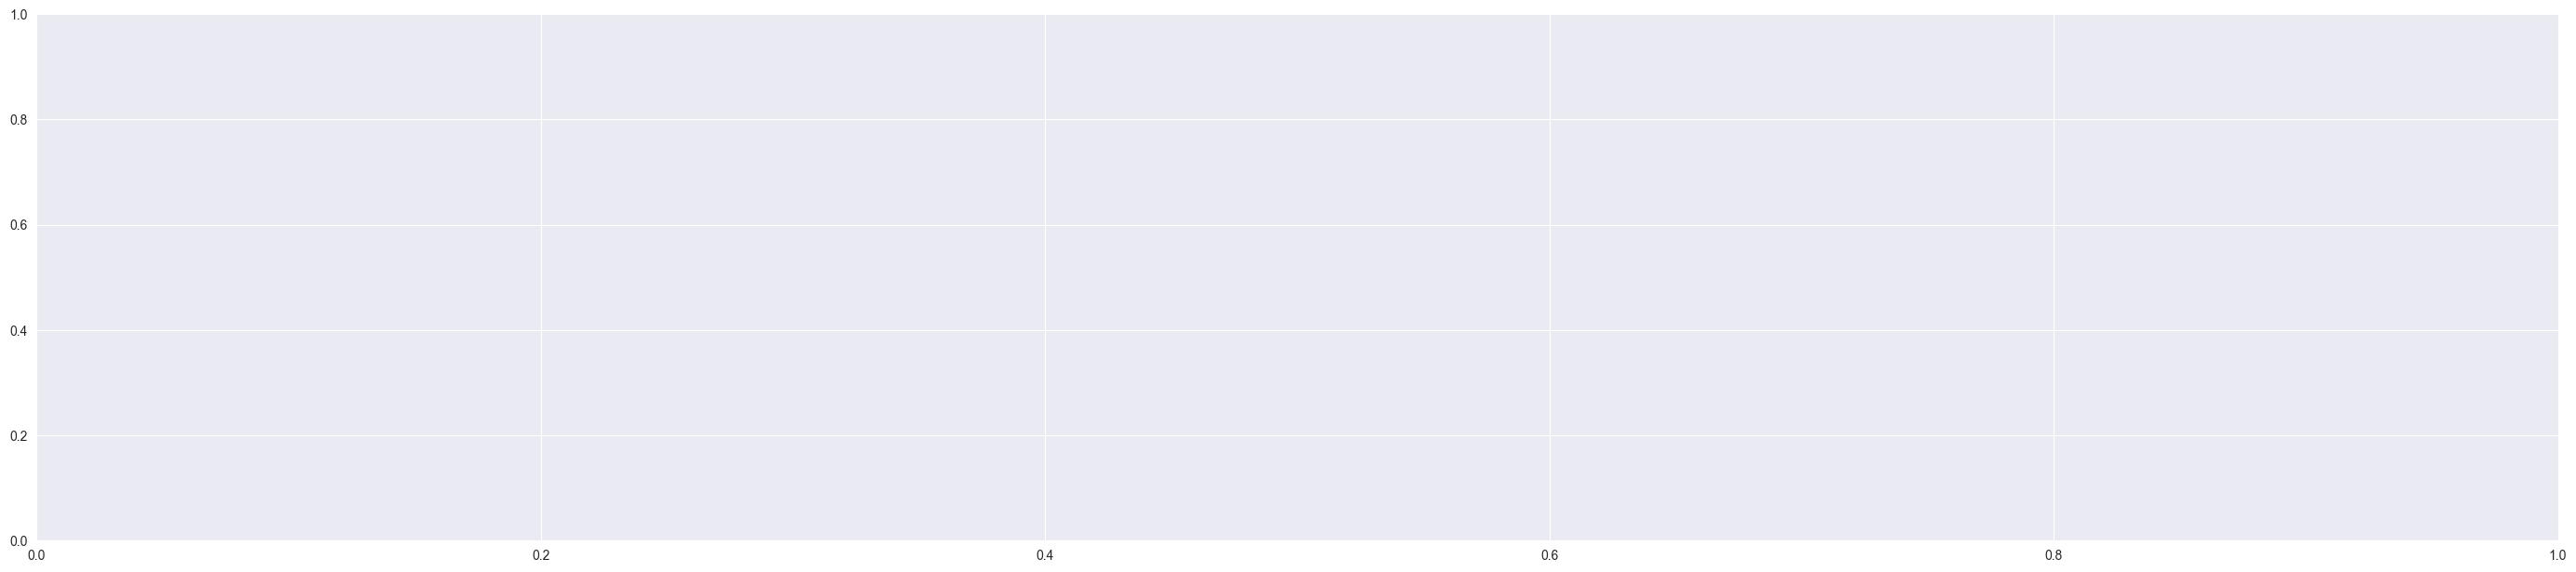

In [37]:
plt.figure(figsize=(35,25))
for i in enumerate(categorical_features):
    plt.subplot(3,1,i[0]+1)
    sns.countplot(i[1])
plt.show()

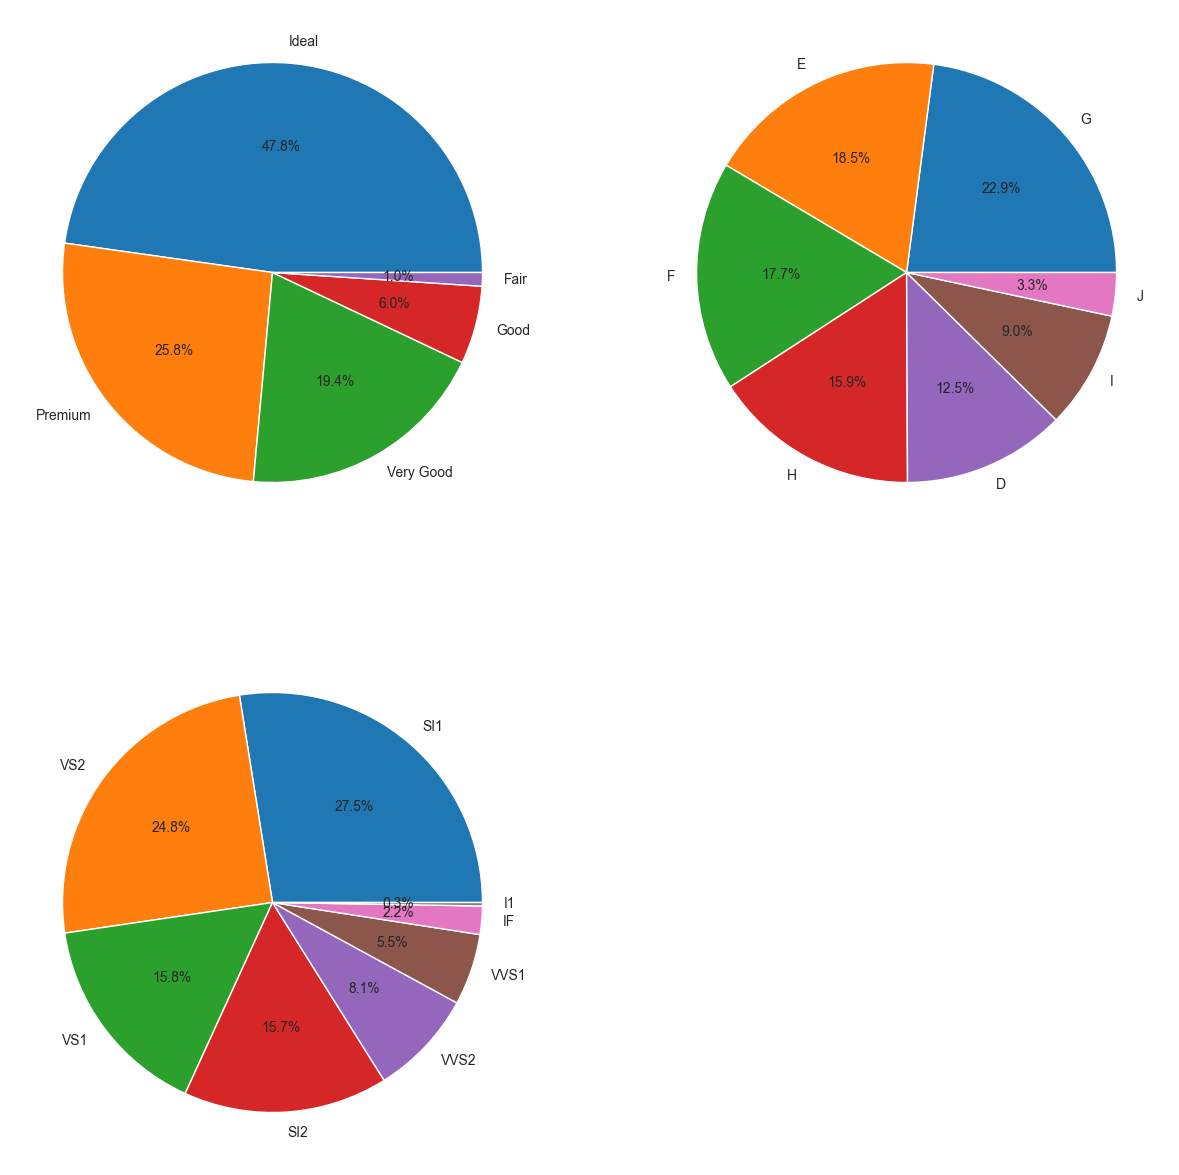

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(categorical_features):
    plt.subplot(2,2,i[0]+1)
    df[i[1]].value_counts().plot.pie(ylabel="", autopct="%.1f%%")
plt.show()

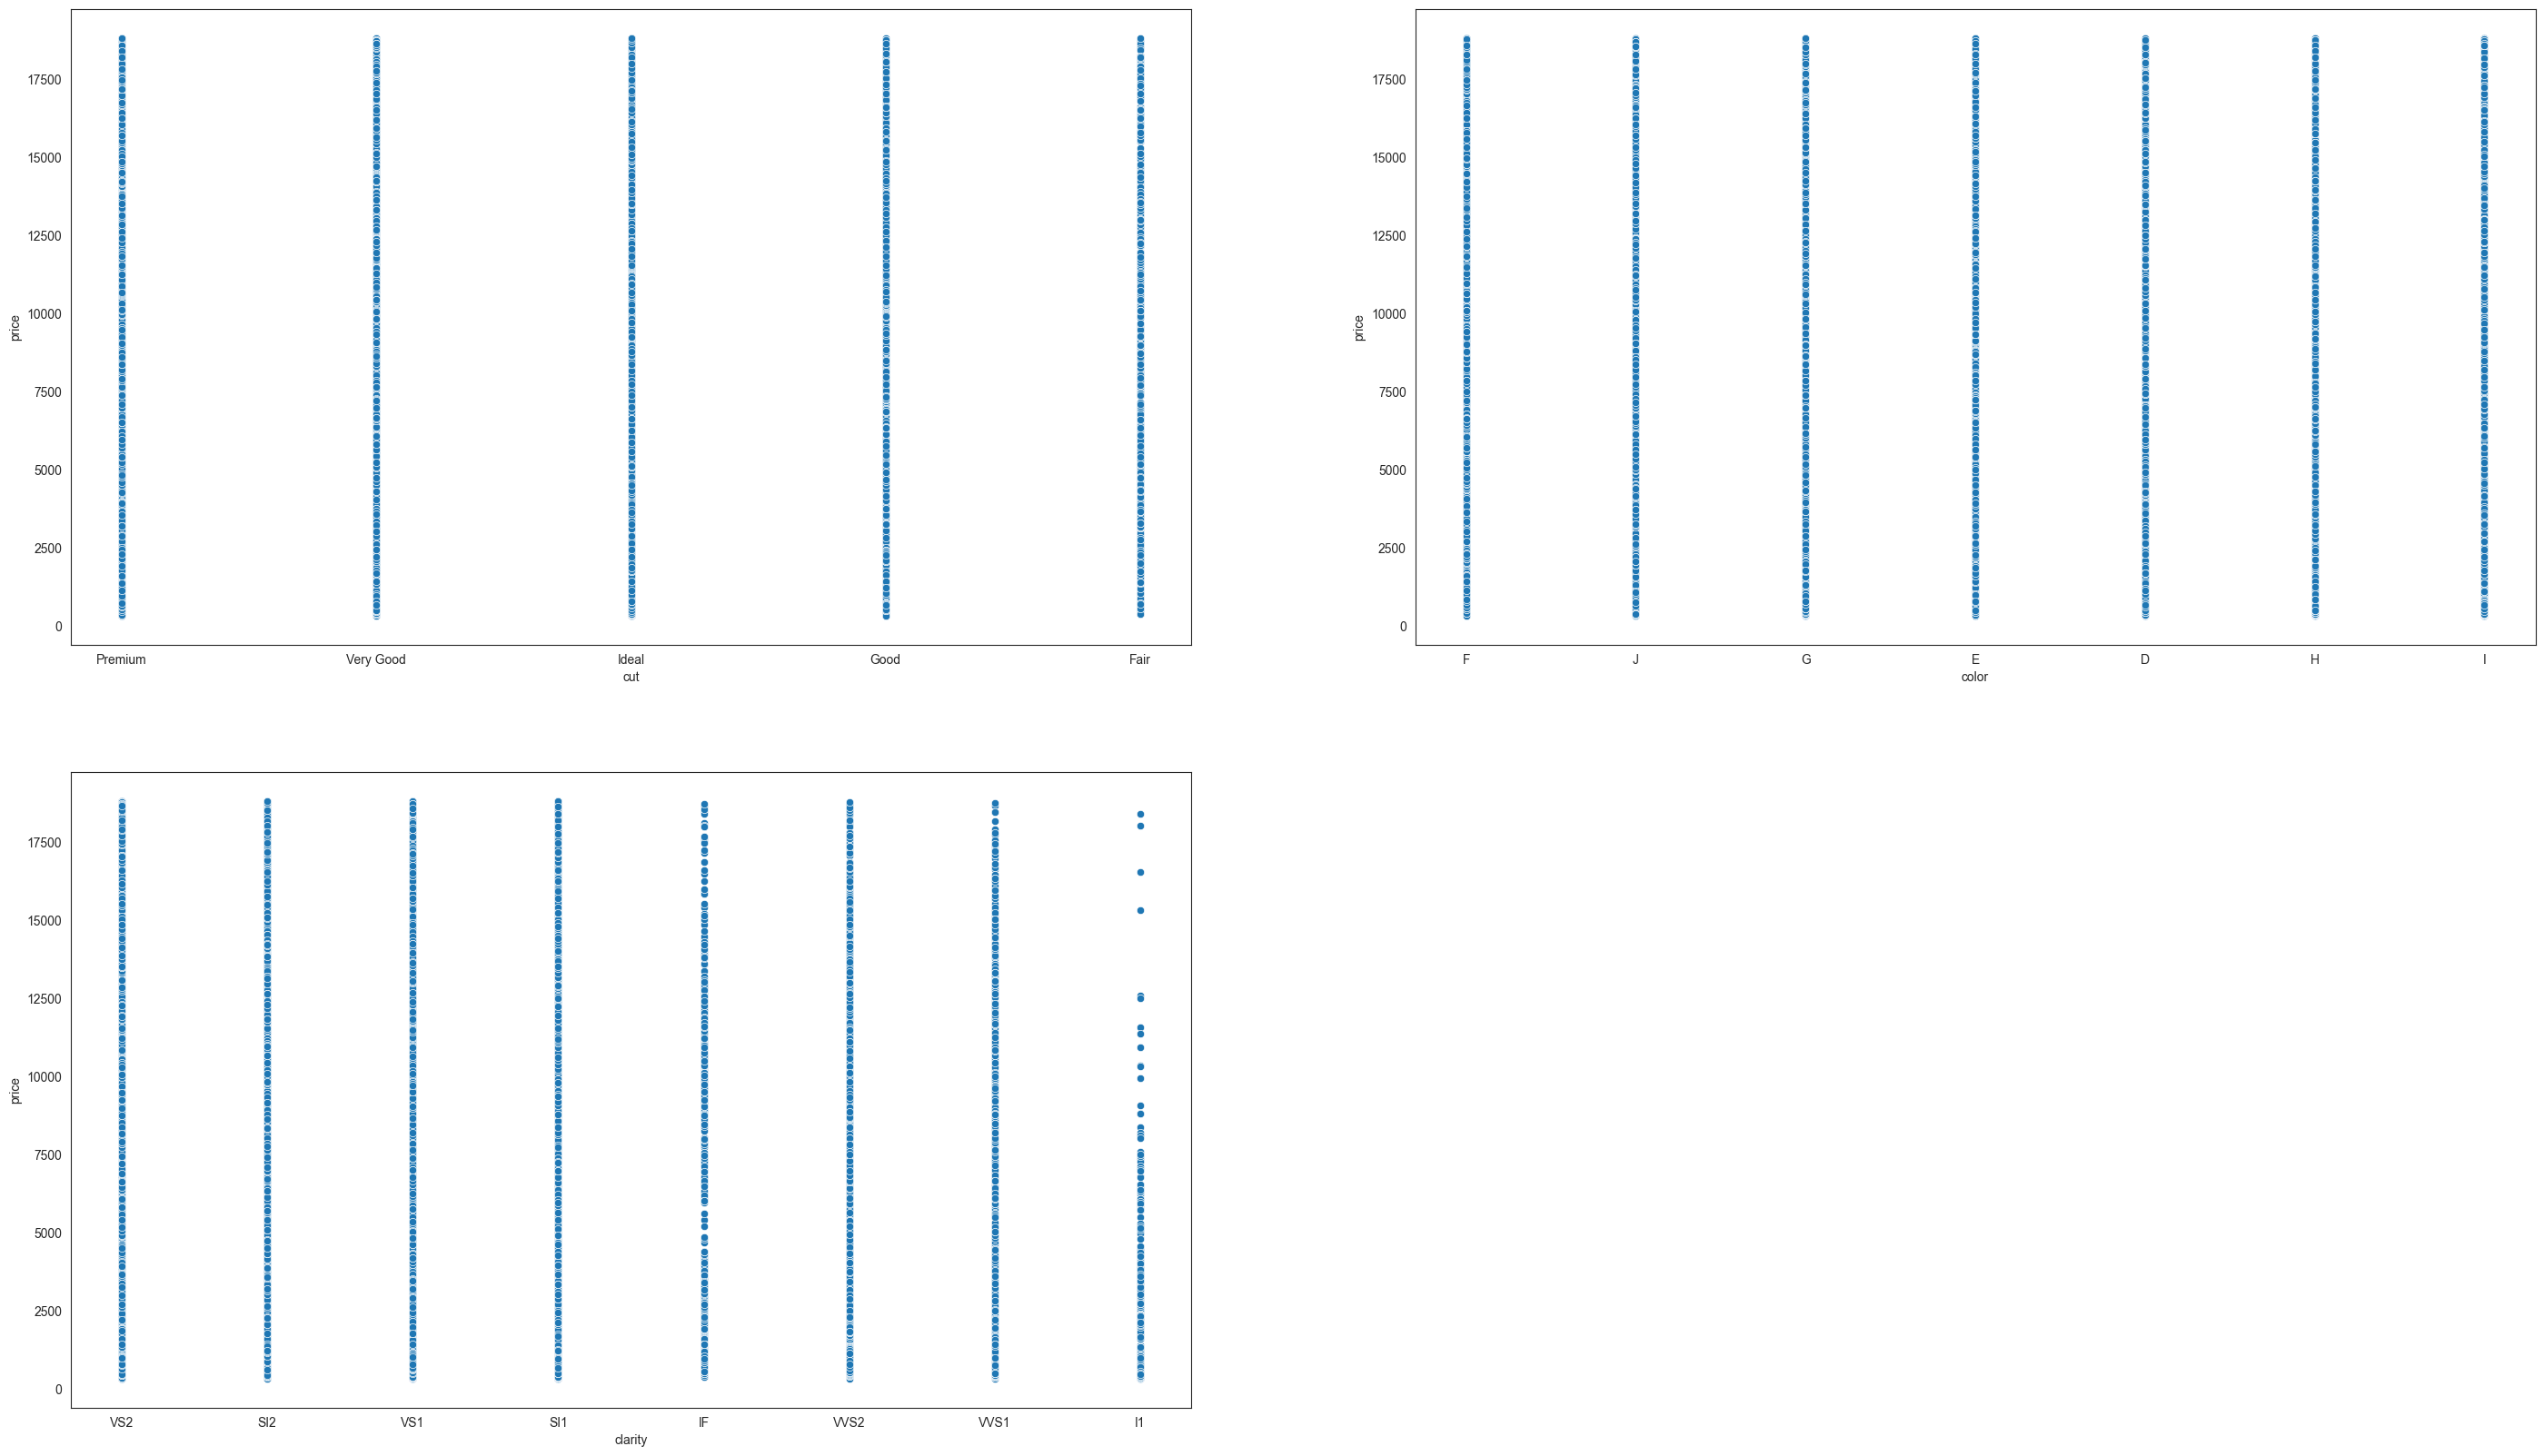

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(categorical_features):
    plt.subplot(2,2,i[0]+1)
    sns.set_style("white")   
    sns.scatterplot(x=df[i[1]], y = df.price)
plt.show()

### **Plots on Numerical Features**

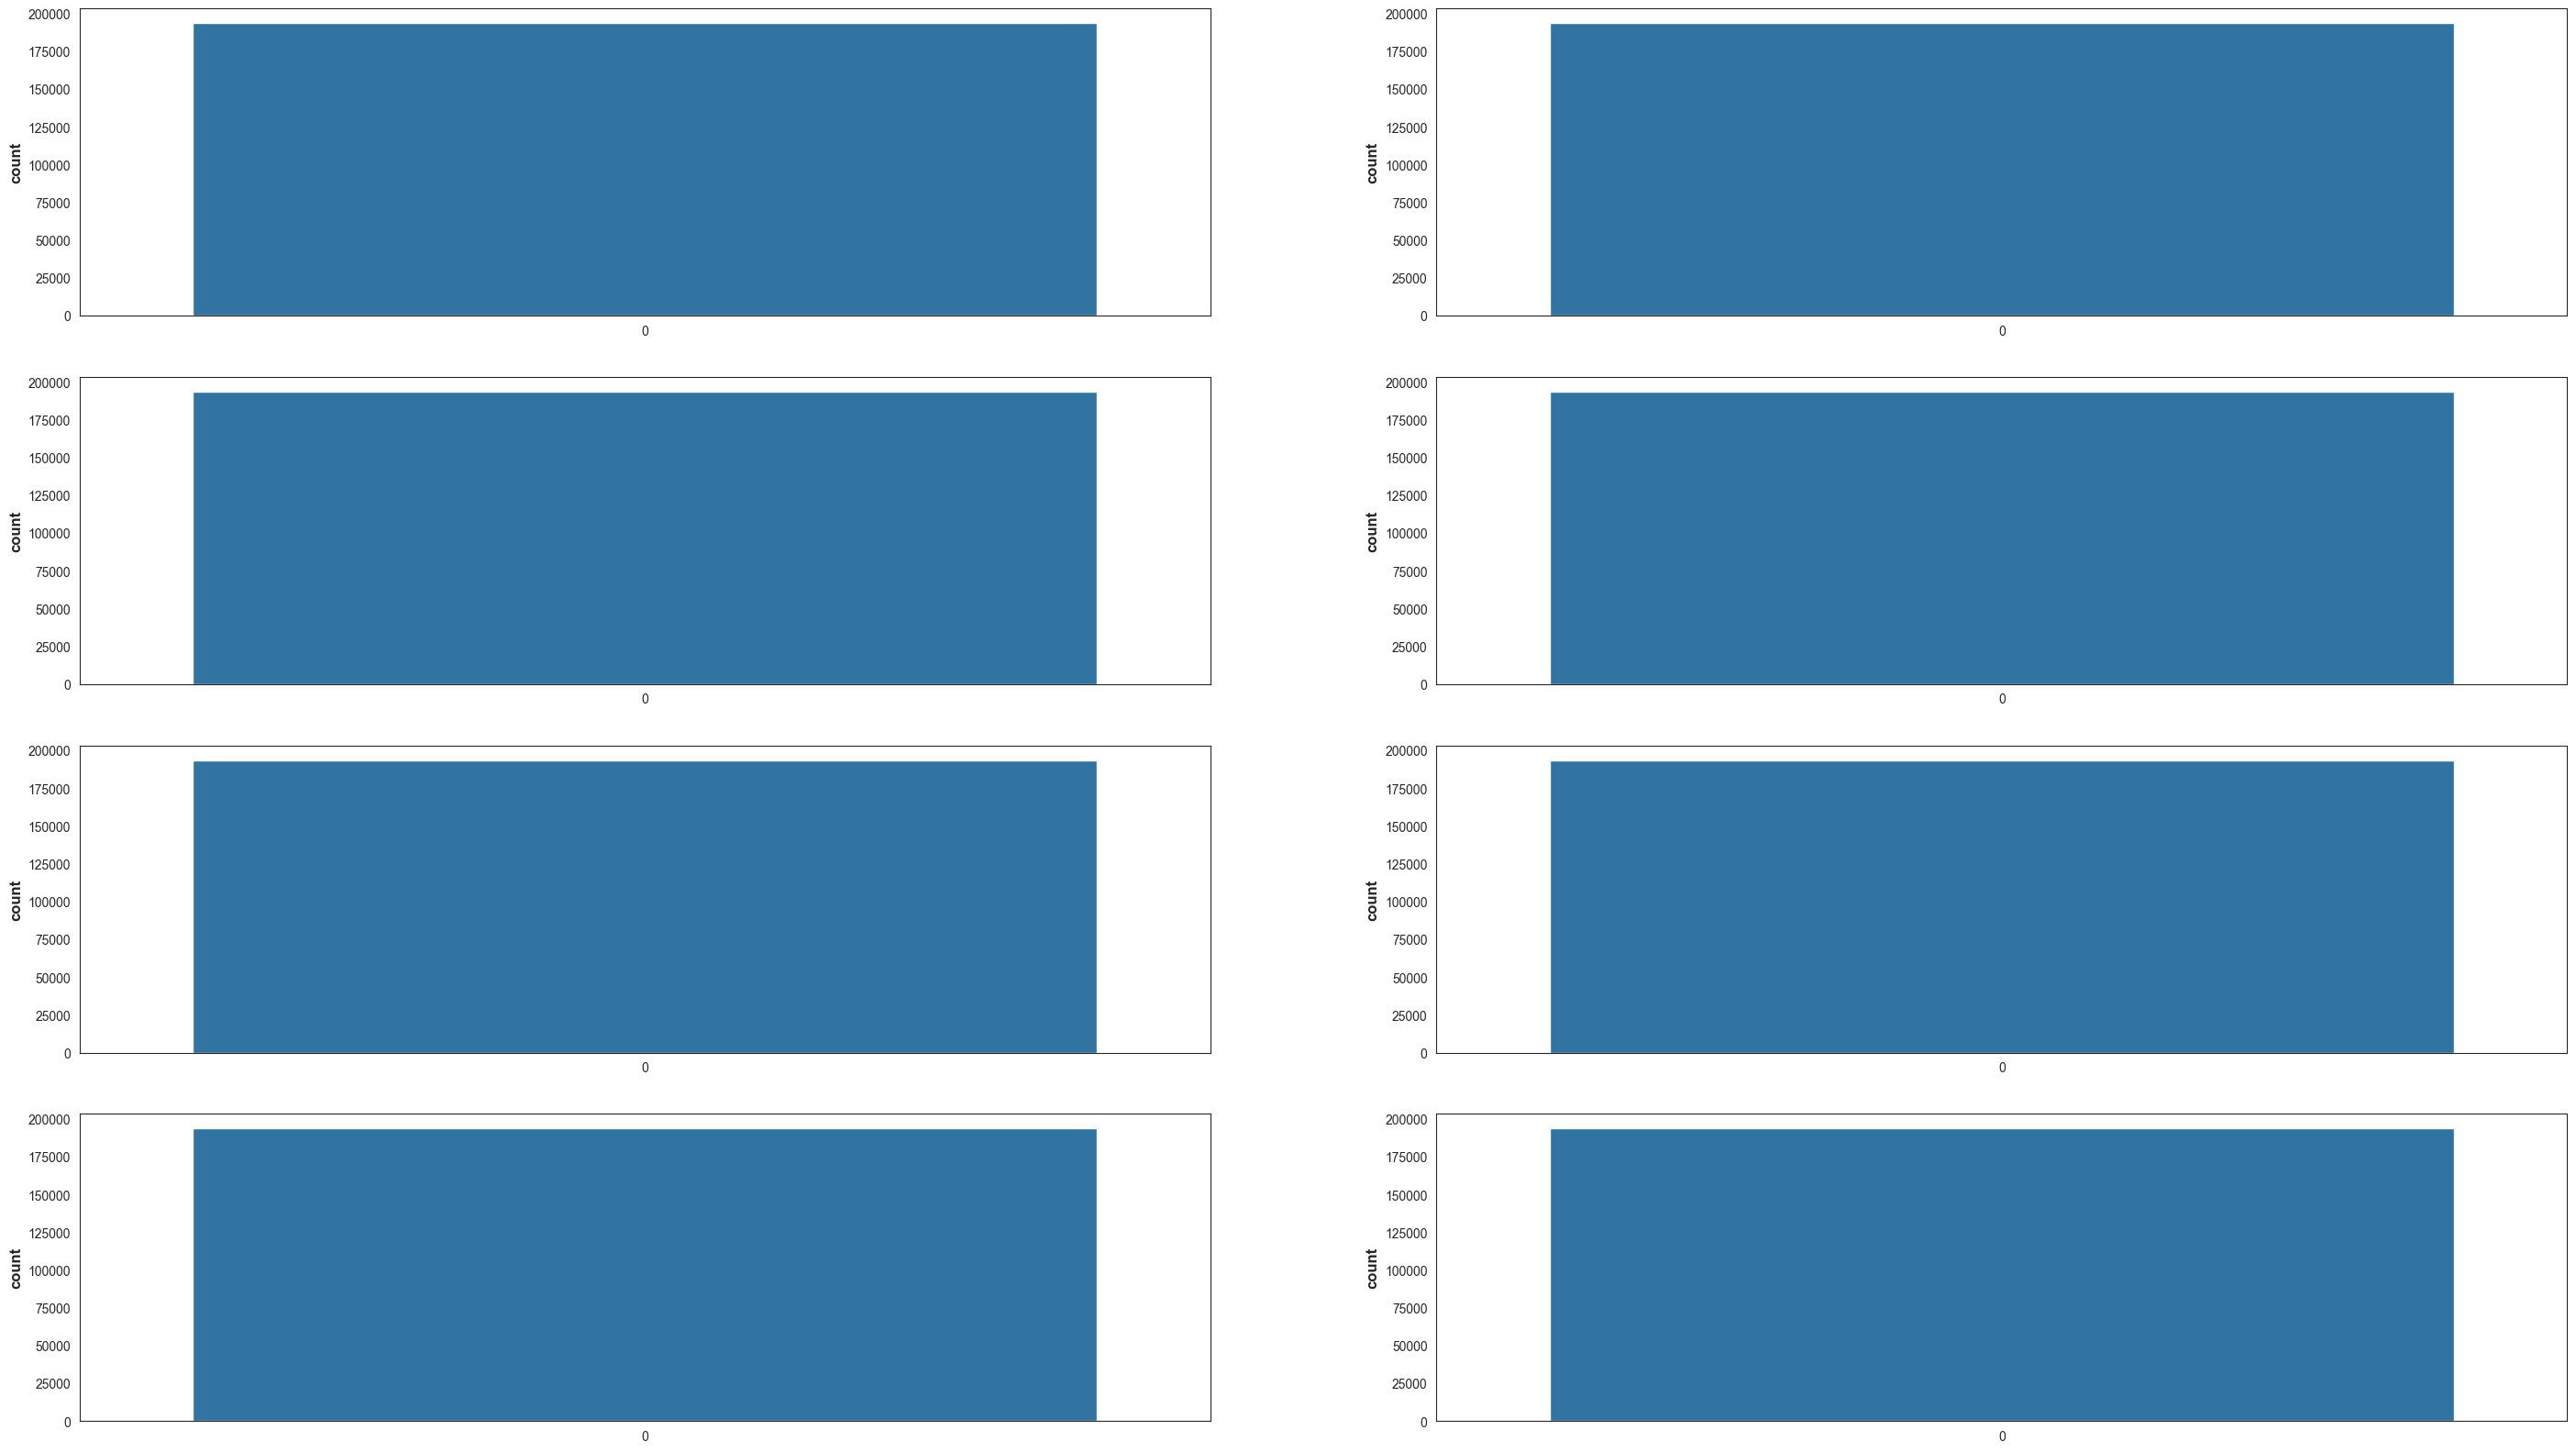

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(numerical_features):
    plt.subplot(4,2,i[0]+1)
    sns.set_style("white")   
    plt.ylabel("Frequency", size = 12, fontweight='bold')
    sns.countplot(df[i[1]])
plt.show()

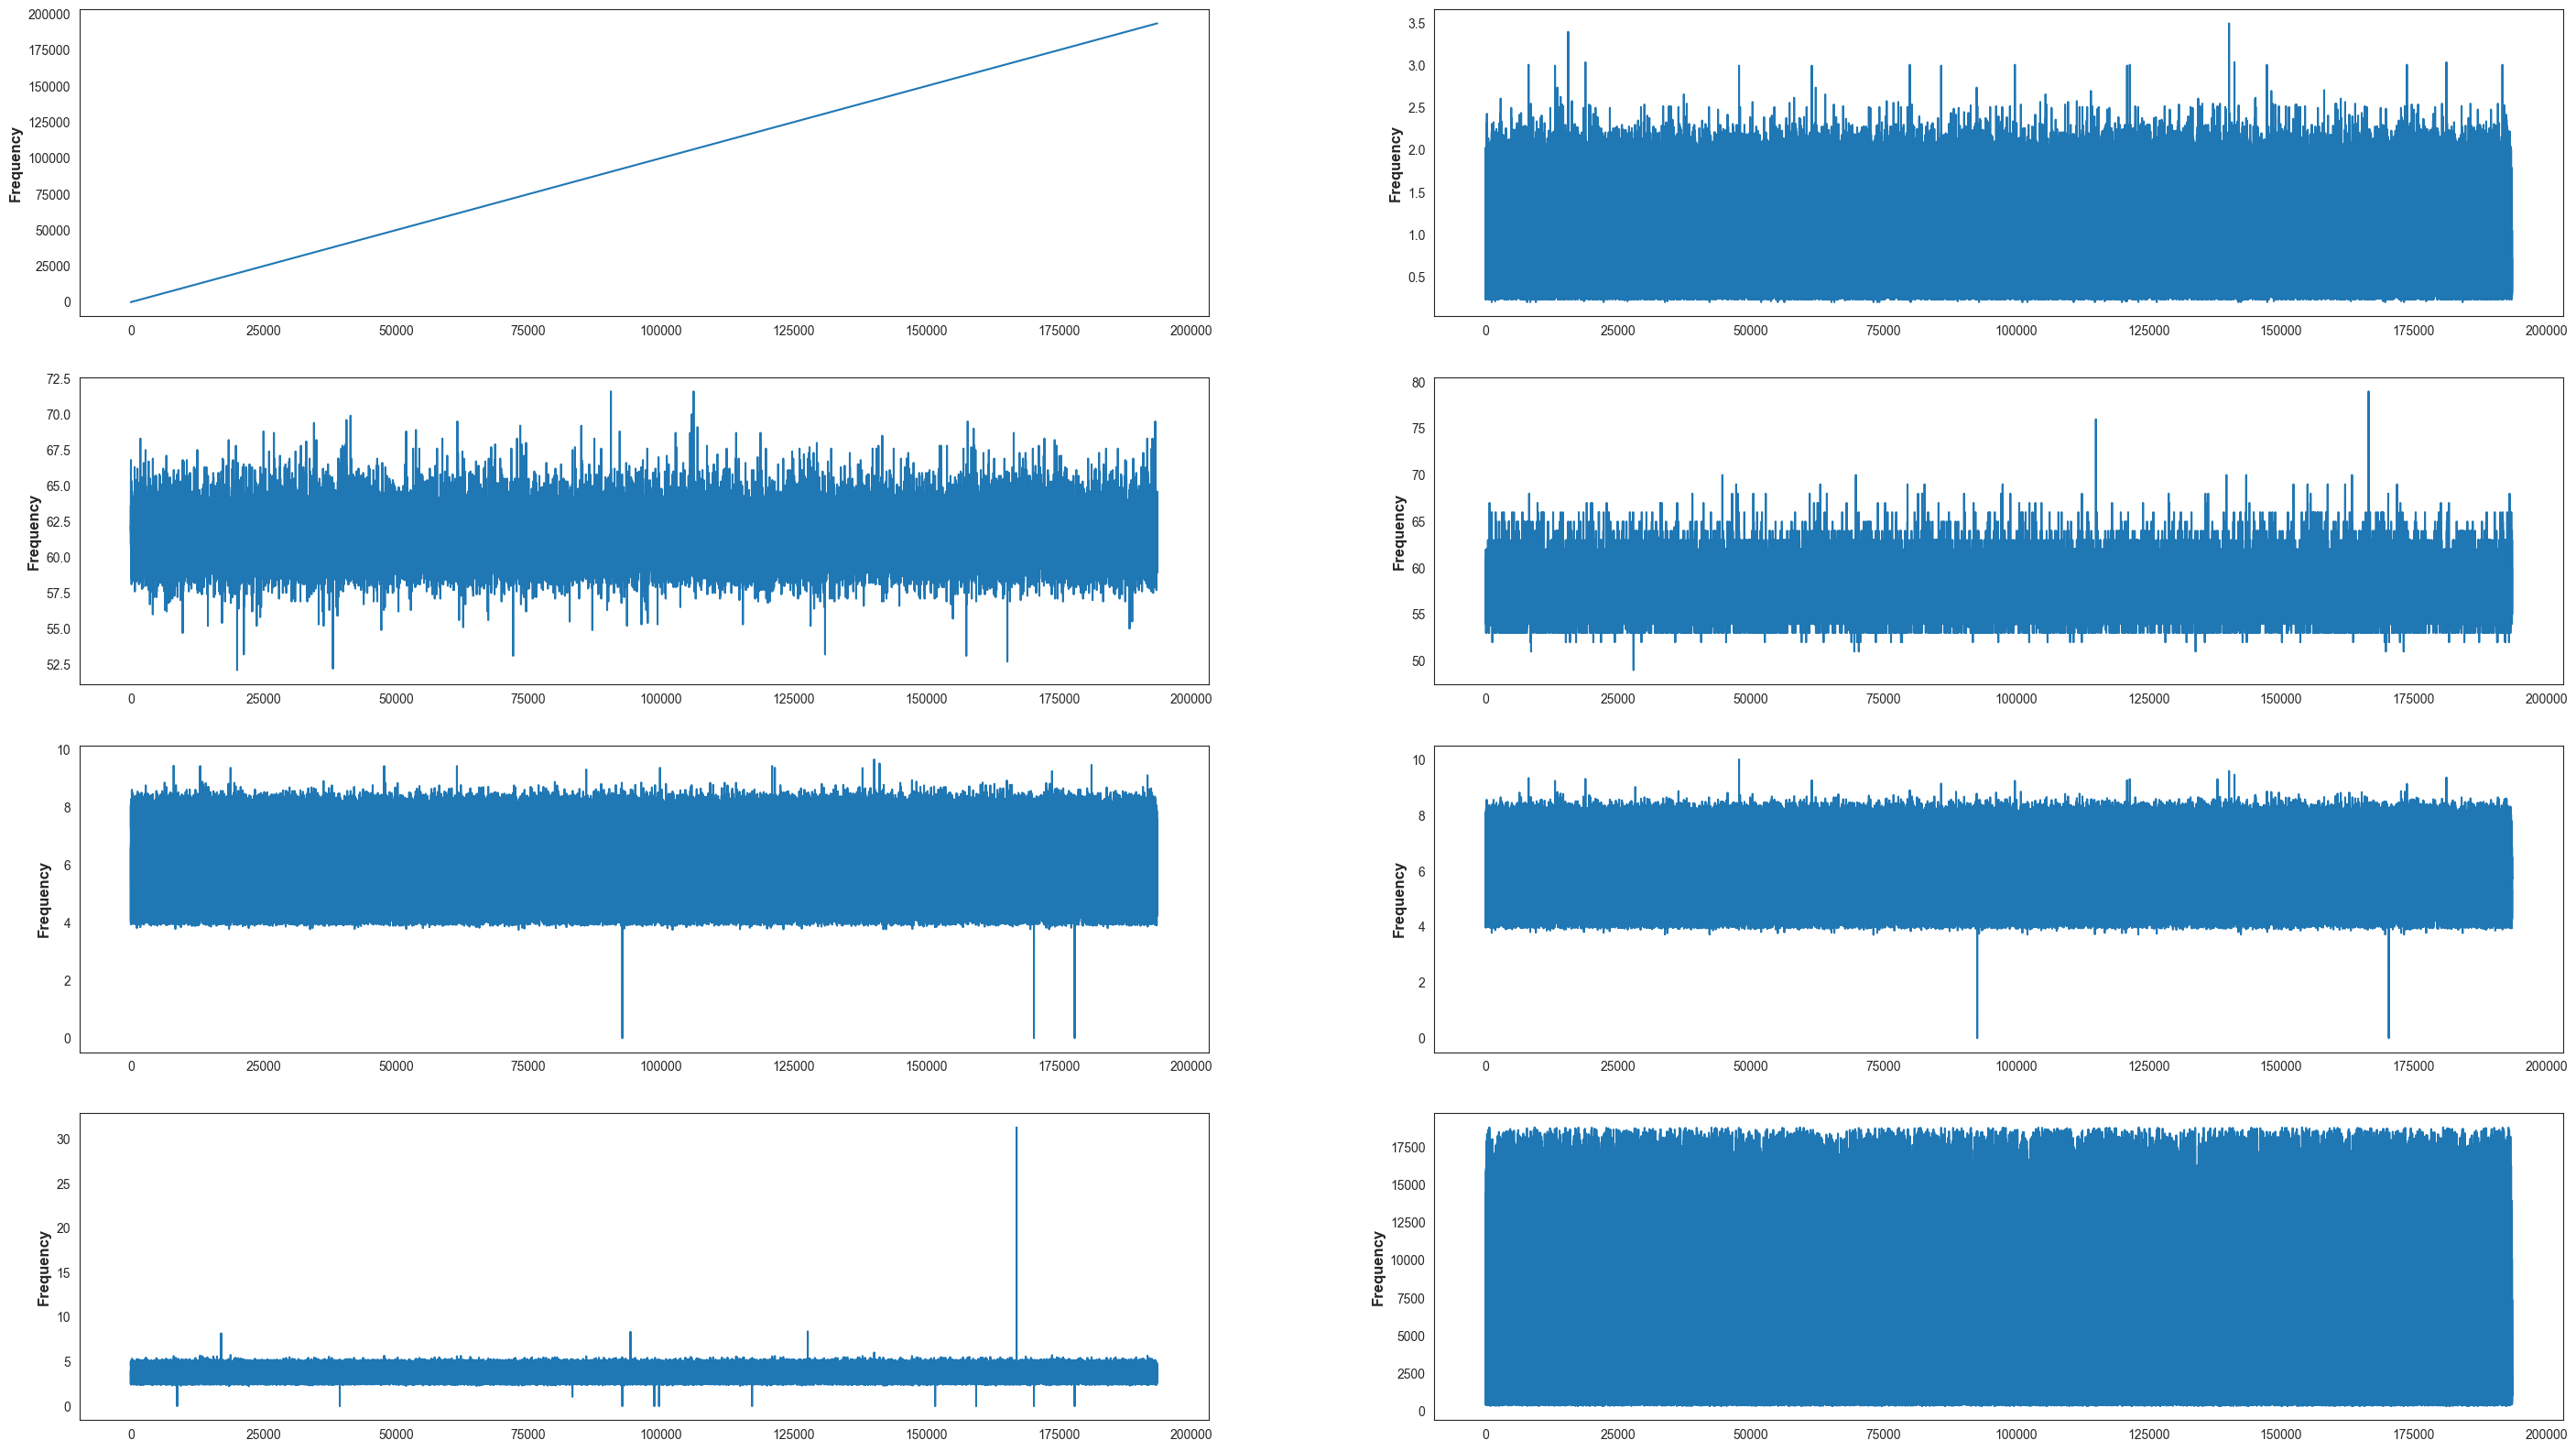

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(numerical_features):
    plt.subplot(4,2,i[0]+1)
    sns.set_style("white")   
    plt.ylabel("Frequency", size = 12, fontweight='bold')
    df[i[1]].plot()
plt.show()

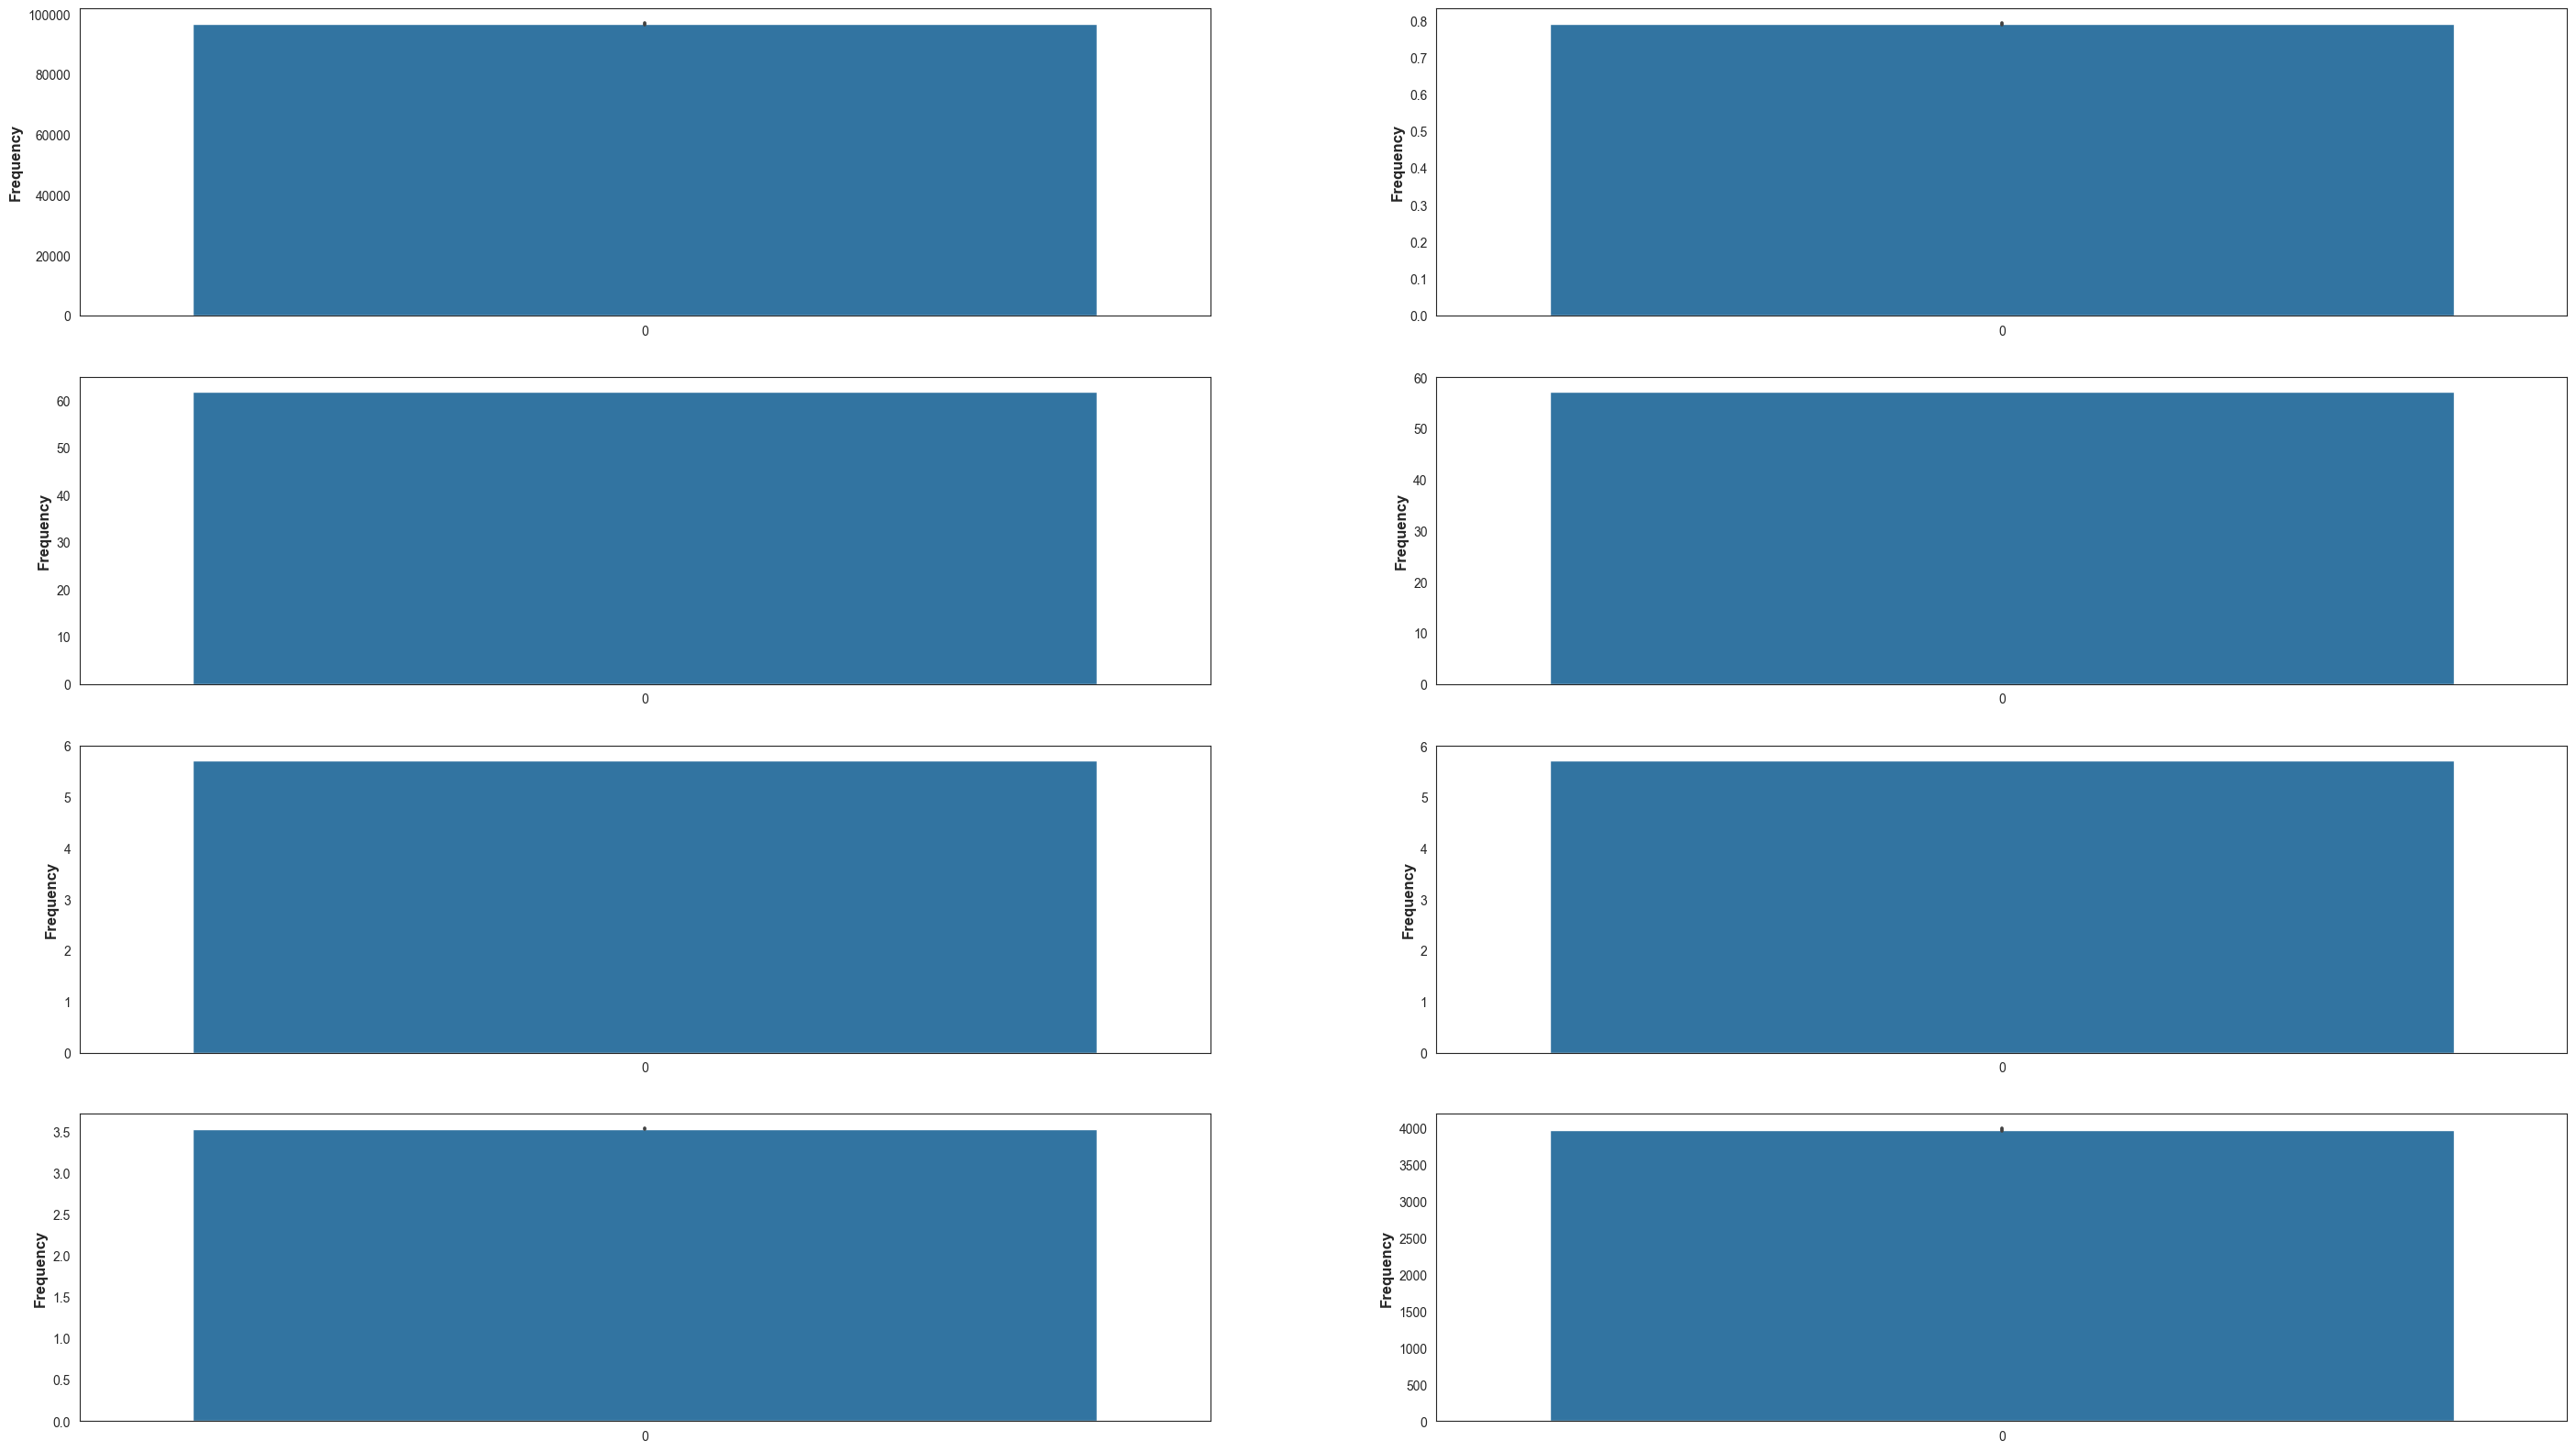

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(numerical_features):
    plt.subplot(4,2,i[0]+1)
    sns.set_style("white")   
    plt.ylabel("Frequency", size = 12, fontweight='bold')
    sns.barplot(df[i[1]])
plt.show()

C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_10484\93379299.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_10484\93379299.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\Neeta Devke\AppData\Local\Temp\ip

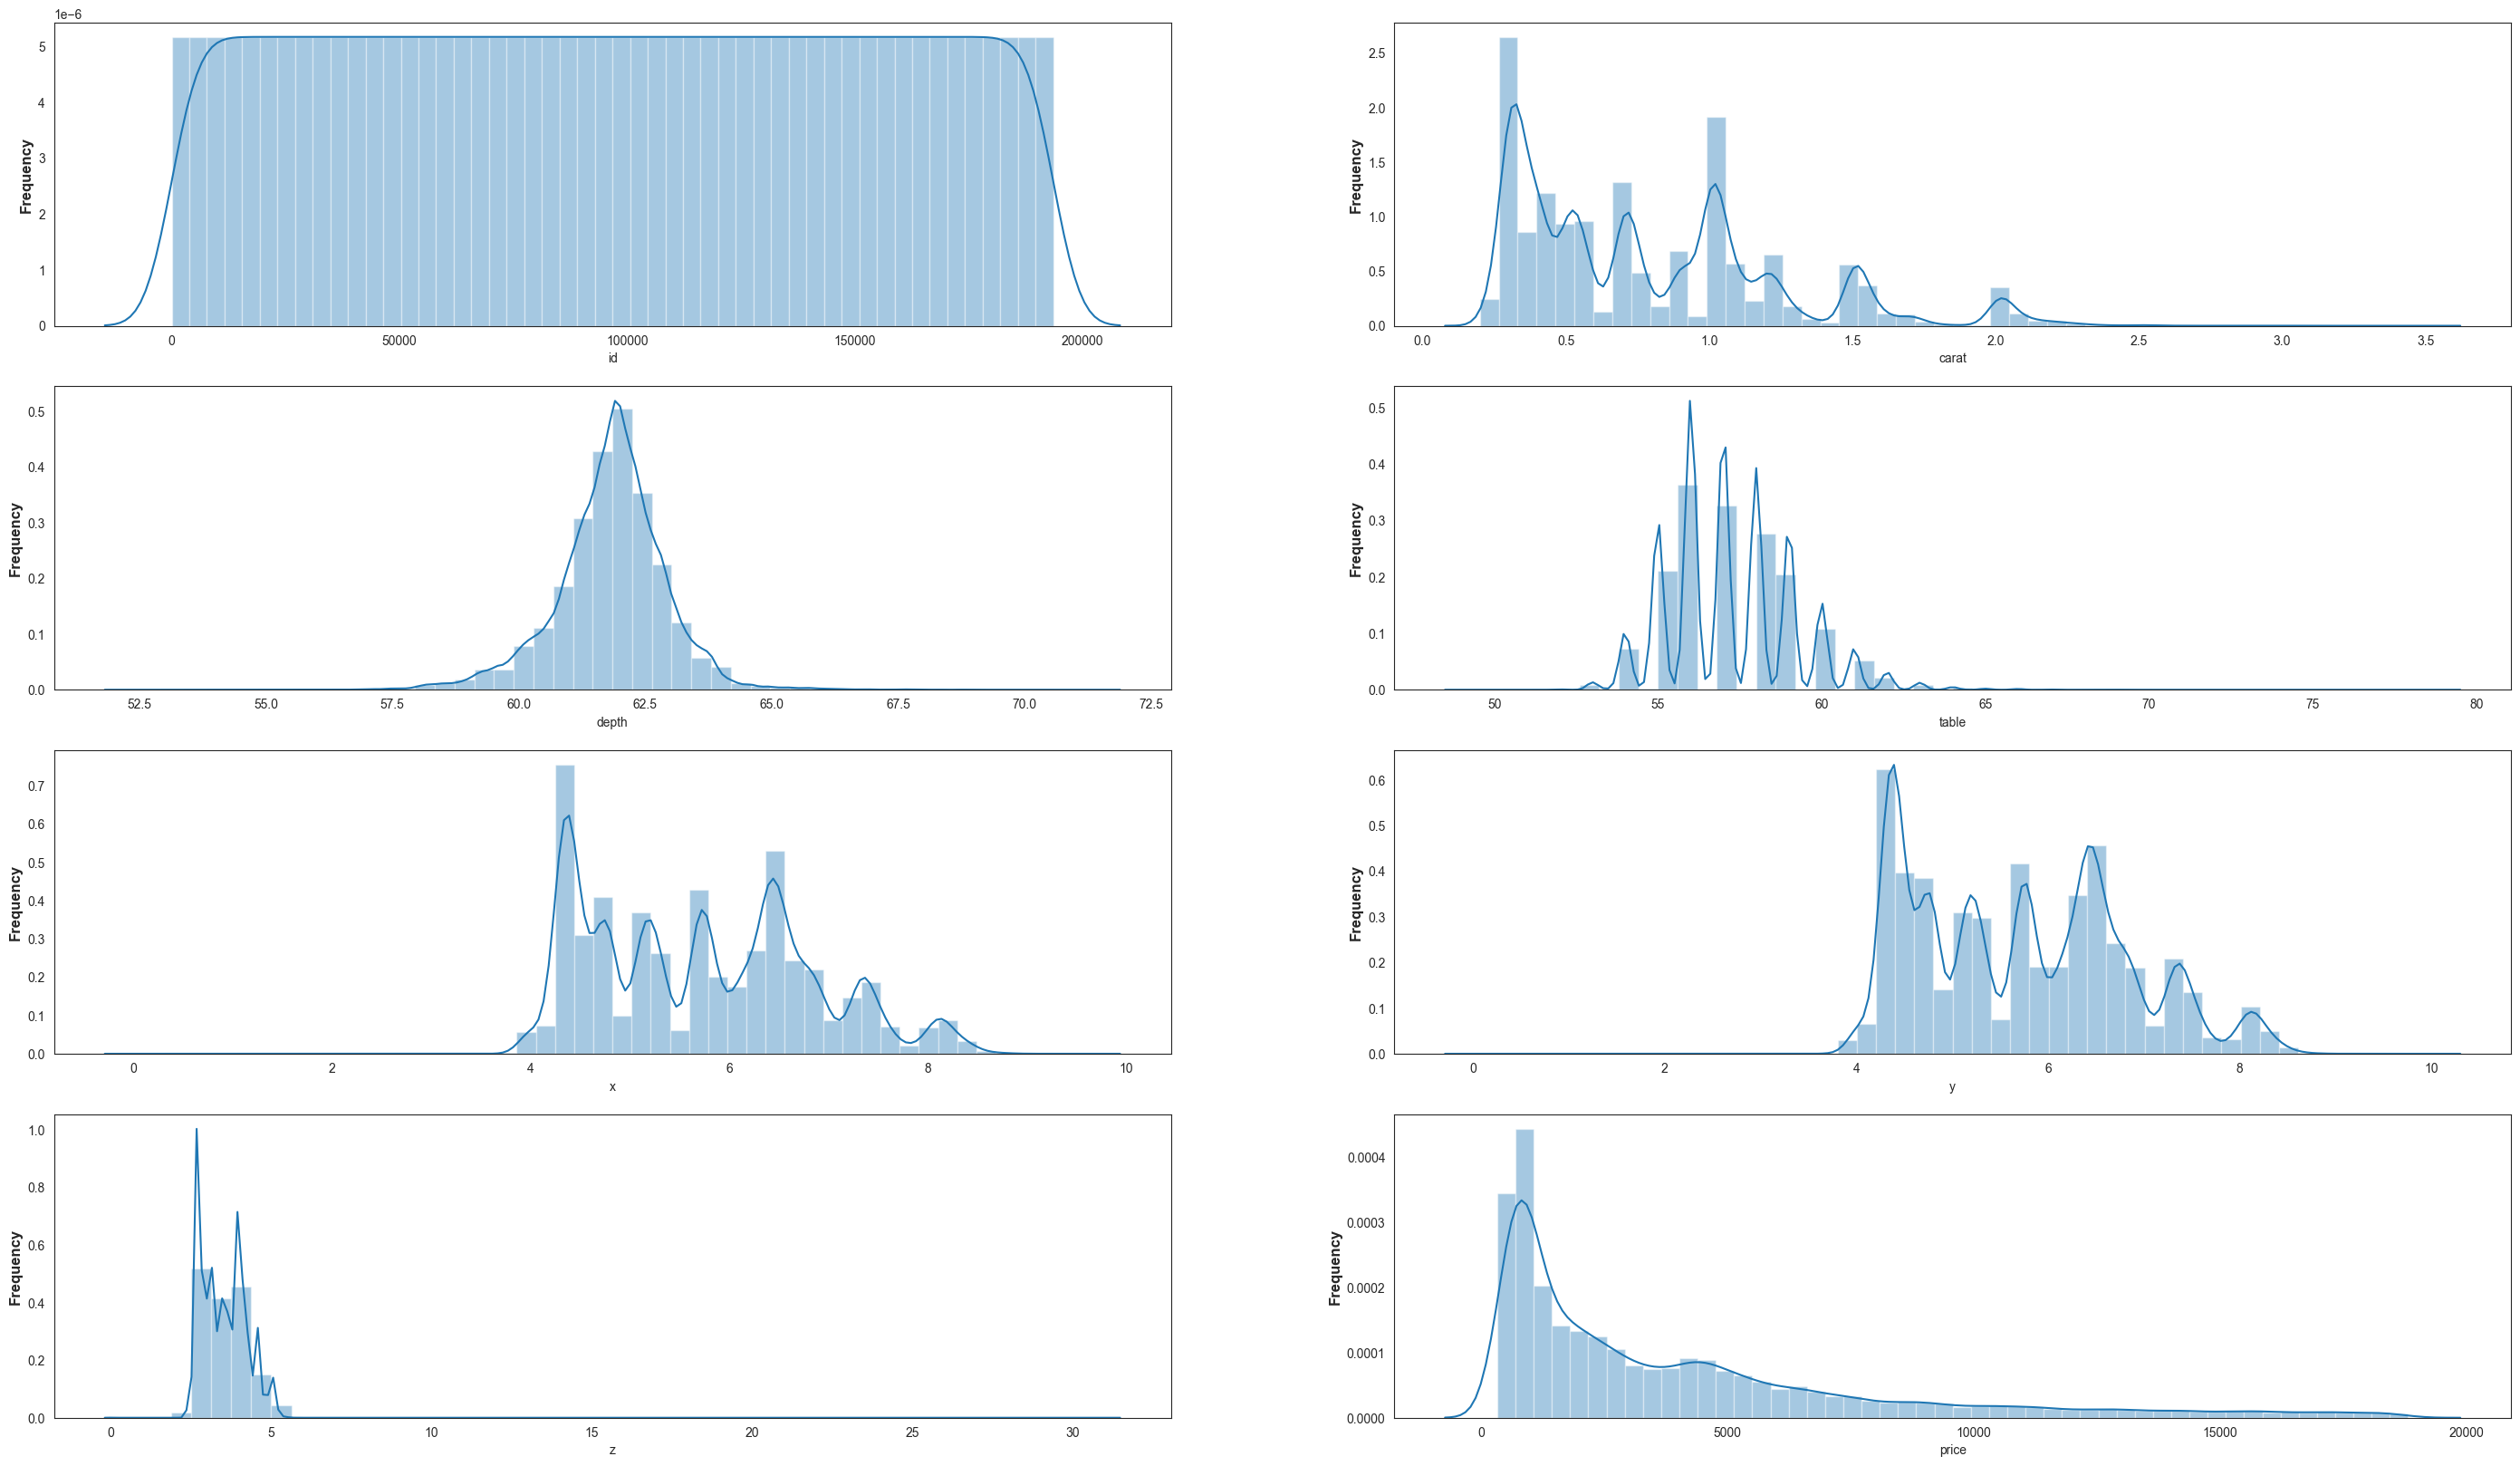

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(numerical_features):
    plt.subplot(4,2,i[0]+1)
    sns.set_style("white")   
    plt.ylabel("Frequency", size = 12, fontweight='bold')
    sns.distplot(df[i[1]])
plt.show()

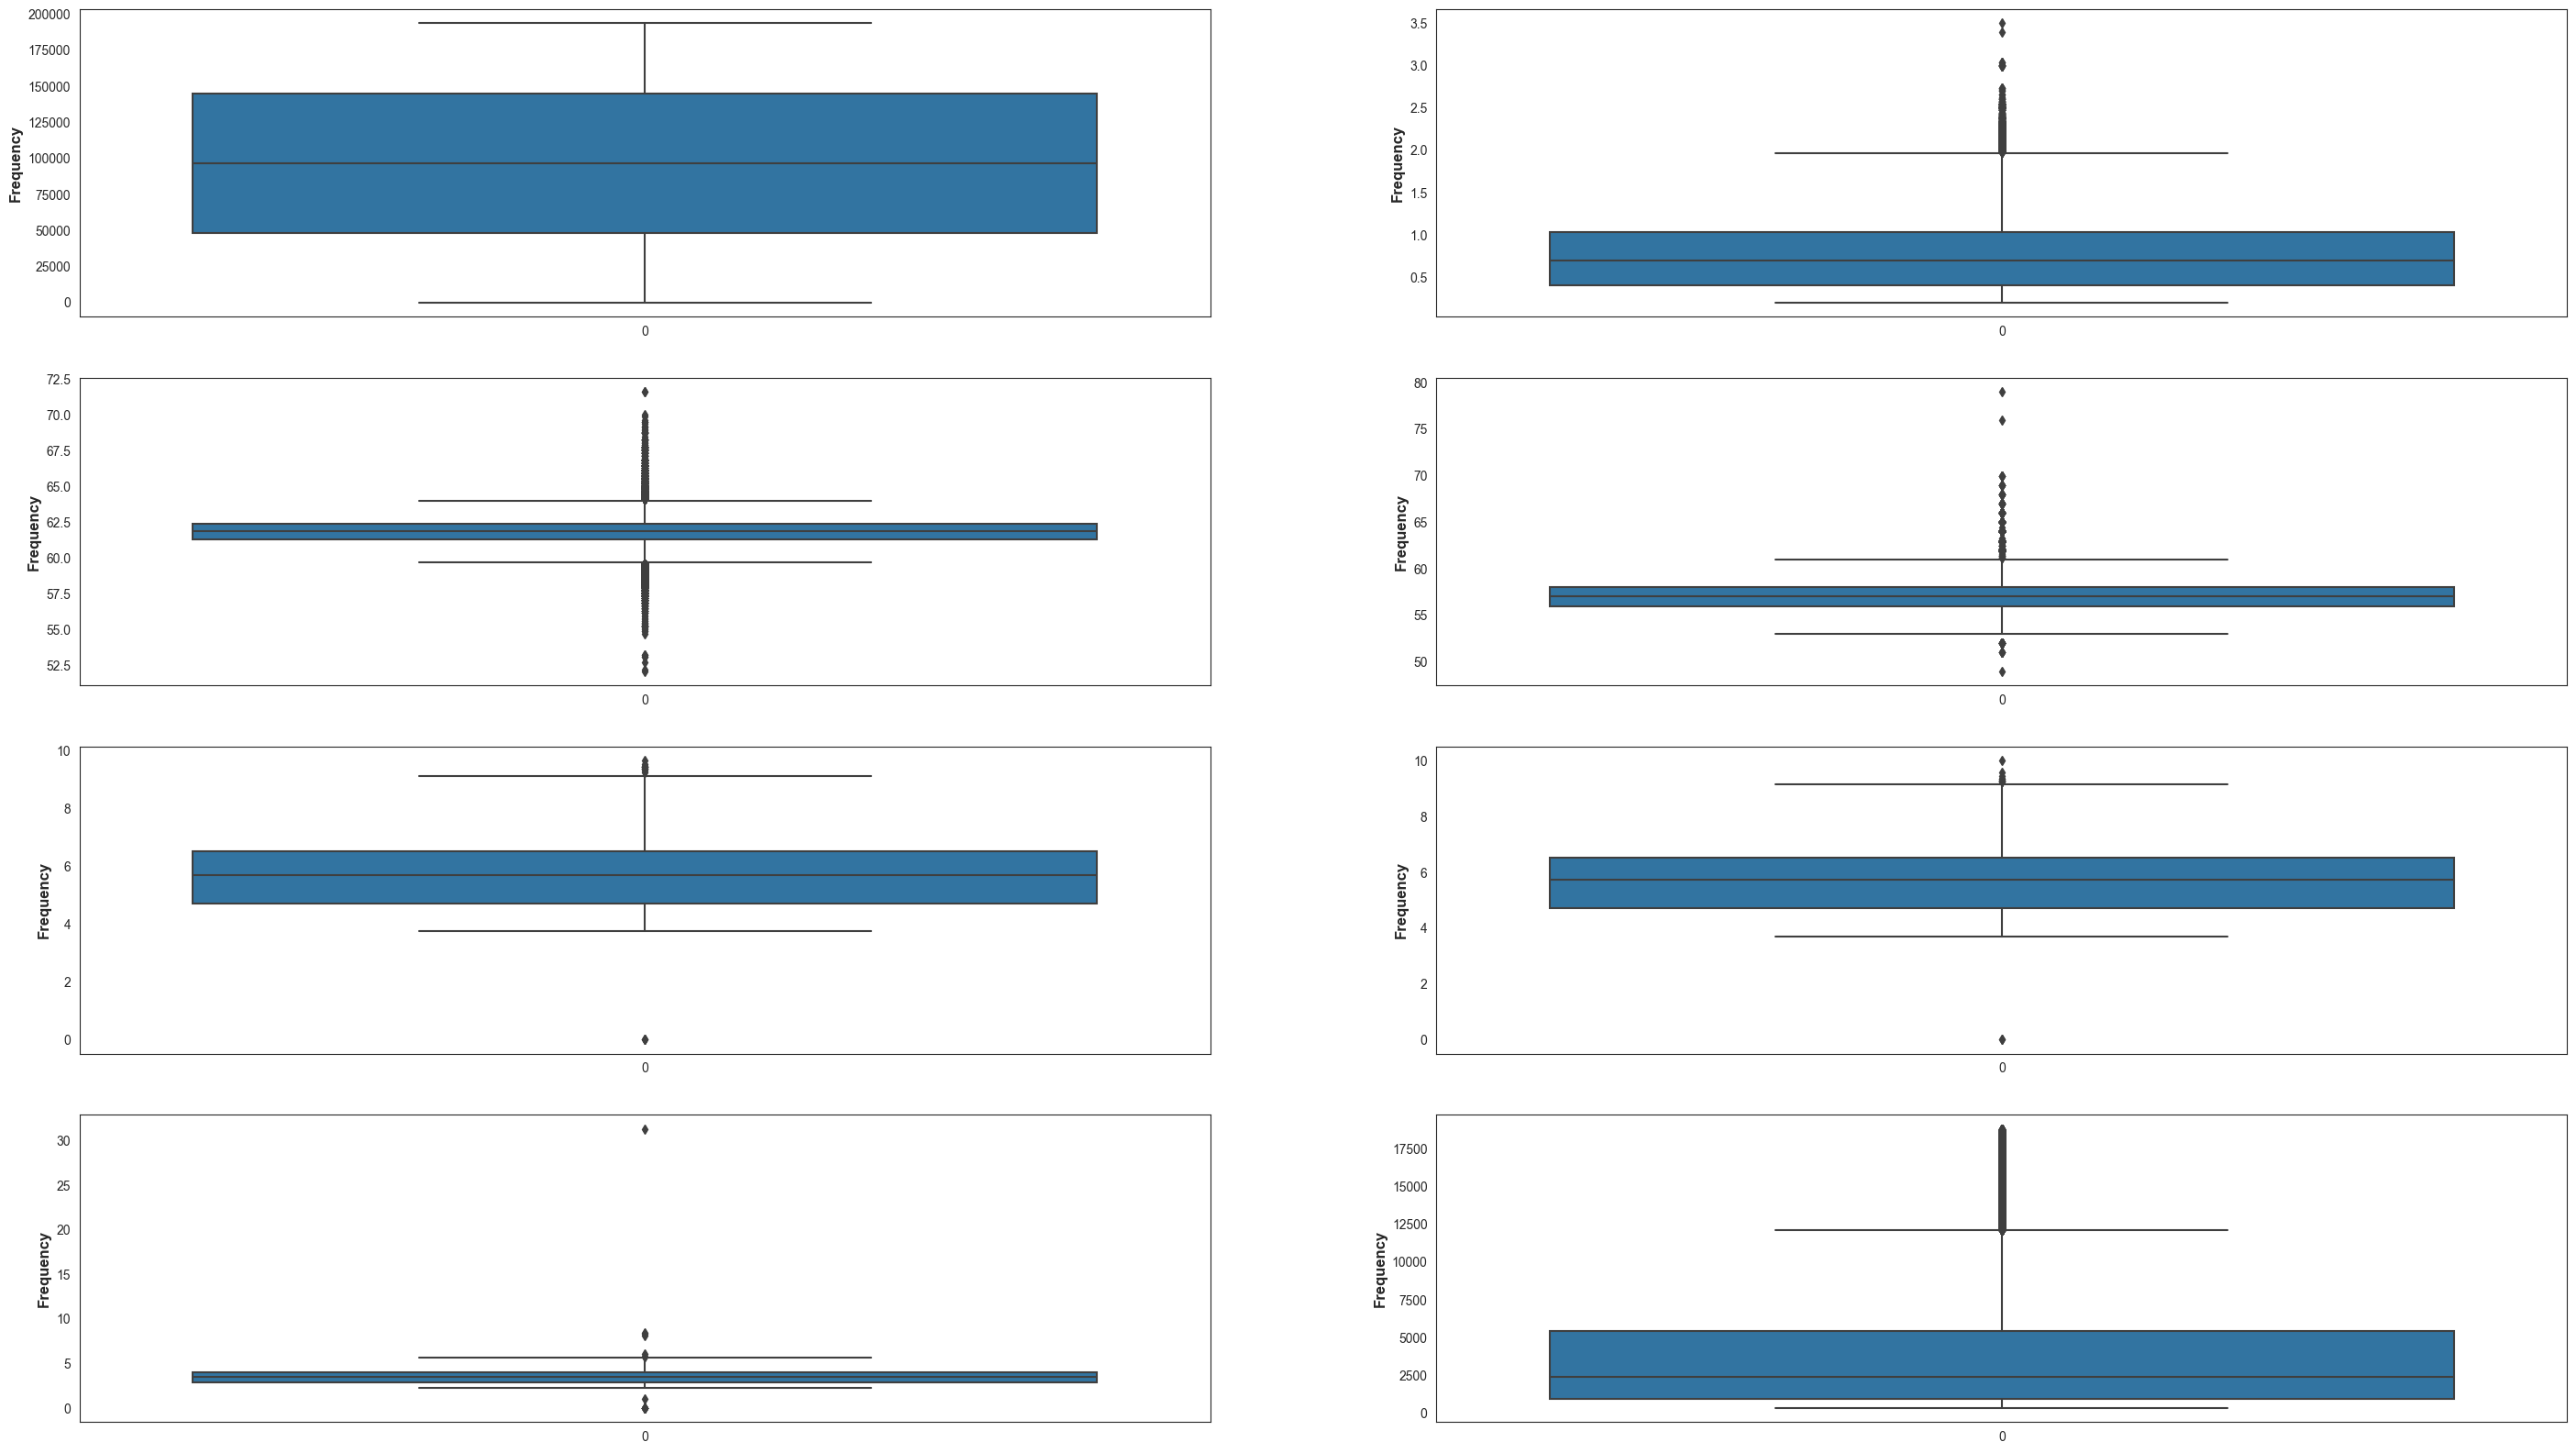

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(numerical_features):
    plt.subplot(4,2,i[0]+1)
    sns.set_style("white")   
    plt.ylabel("Frequency", size = 12, fontweight='bold')
    sns.boxplot(df[i[1]])
plt.show()

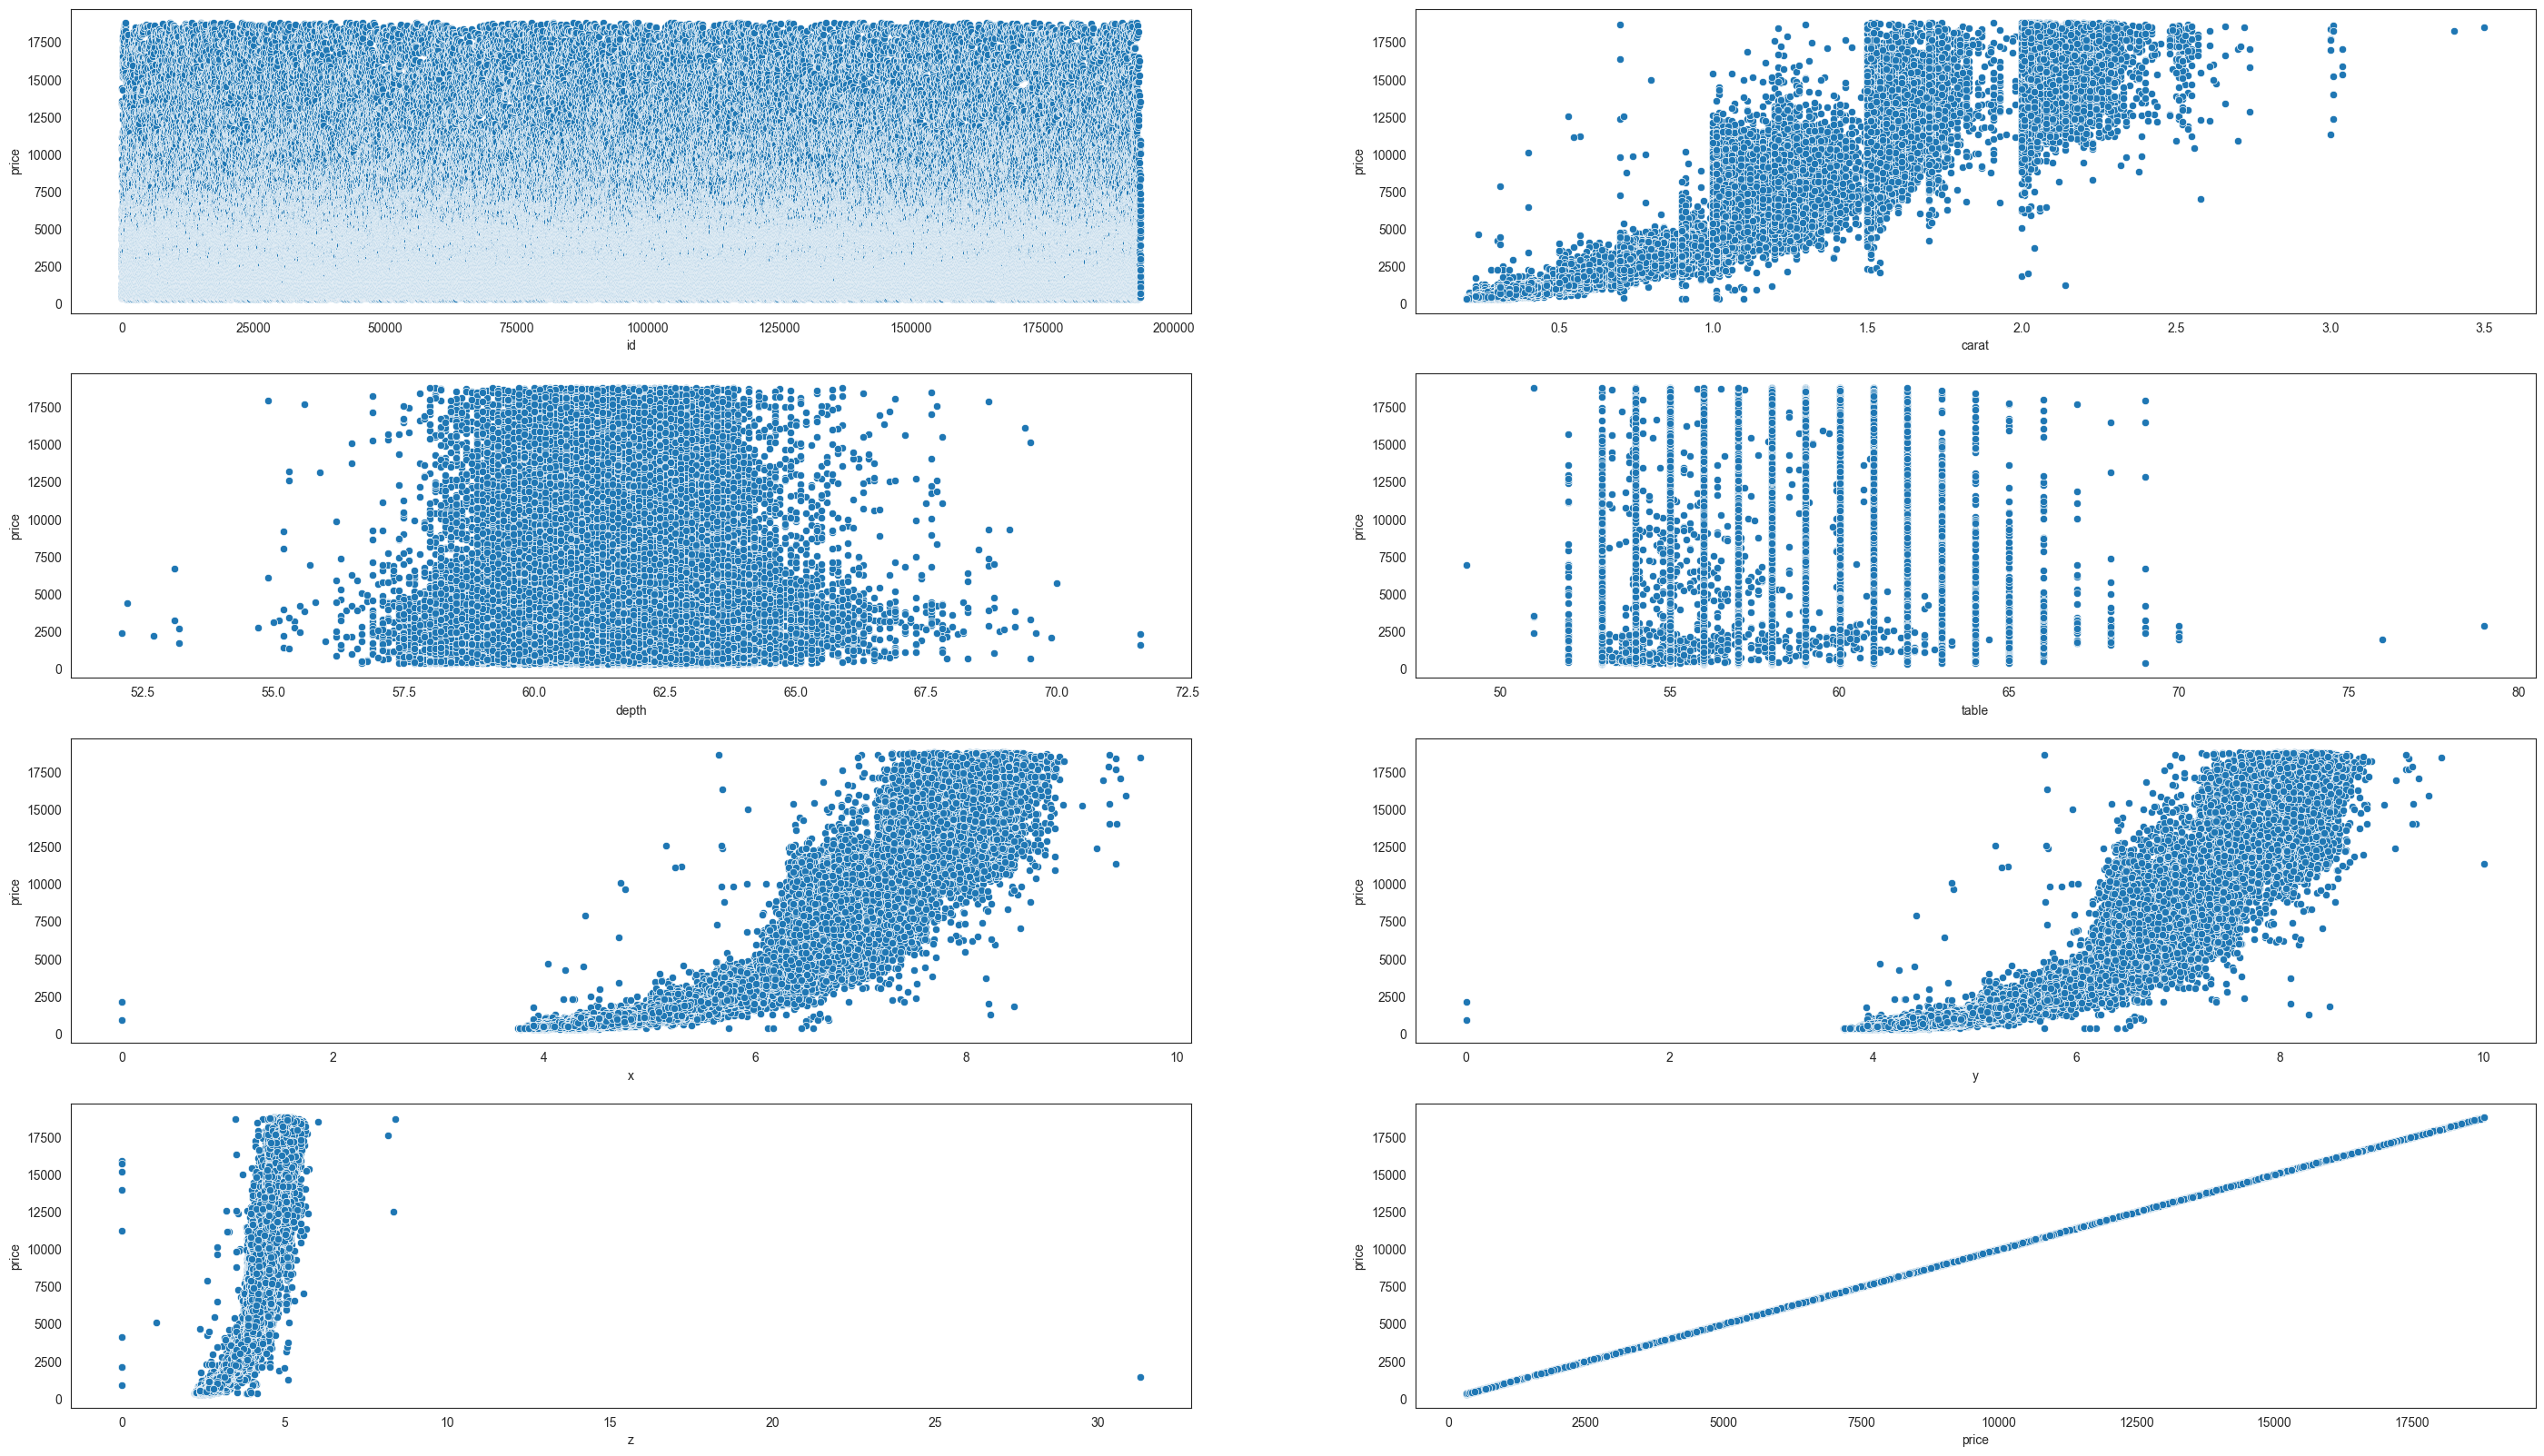

In [ ]:
plt.figure(figsize=(35,20))
for i in enumerate(numerical_features):
    plt.subplot(4,2,i[0]+1)
    sns.set_style("white")   
    sns.scatterplot(x=df[i[1]], y = df.price)
plt.show()

<Figure size 3000x2500 with 0 Axes>

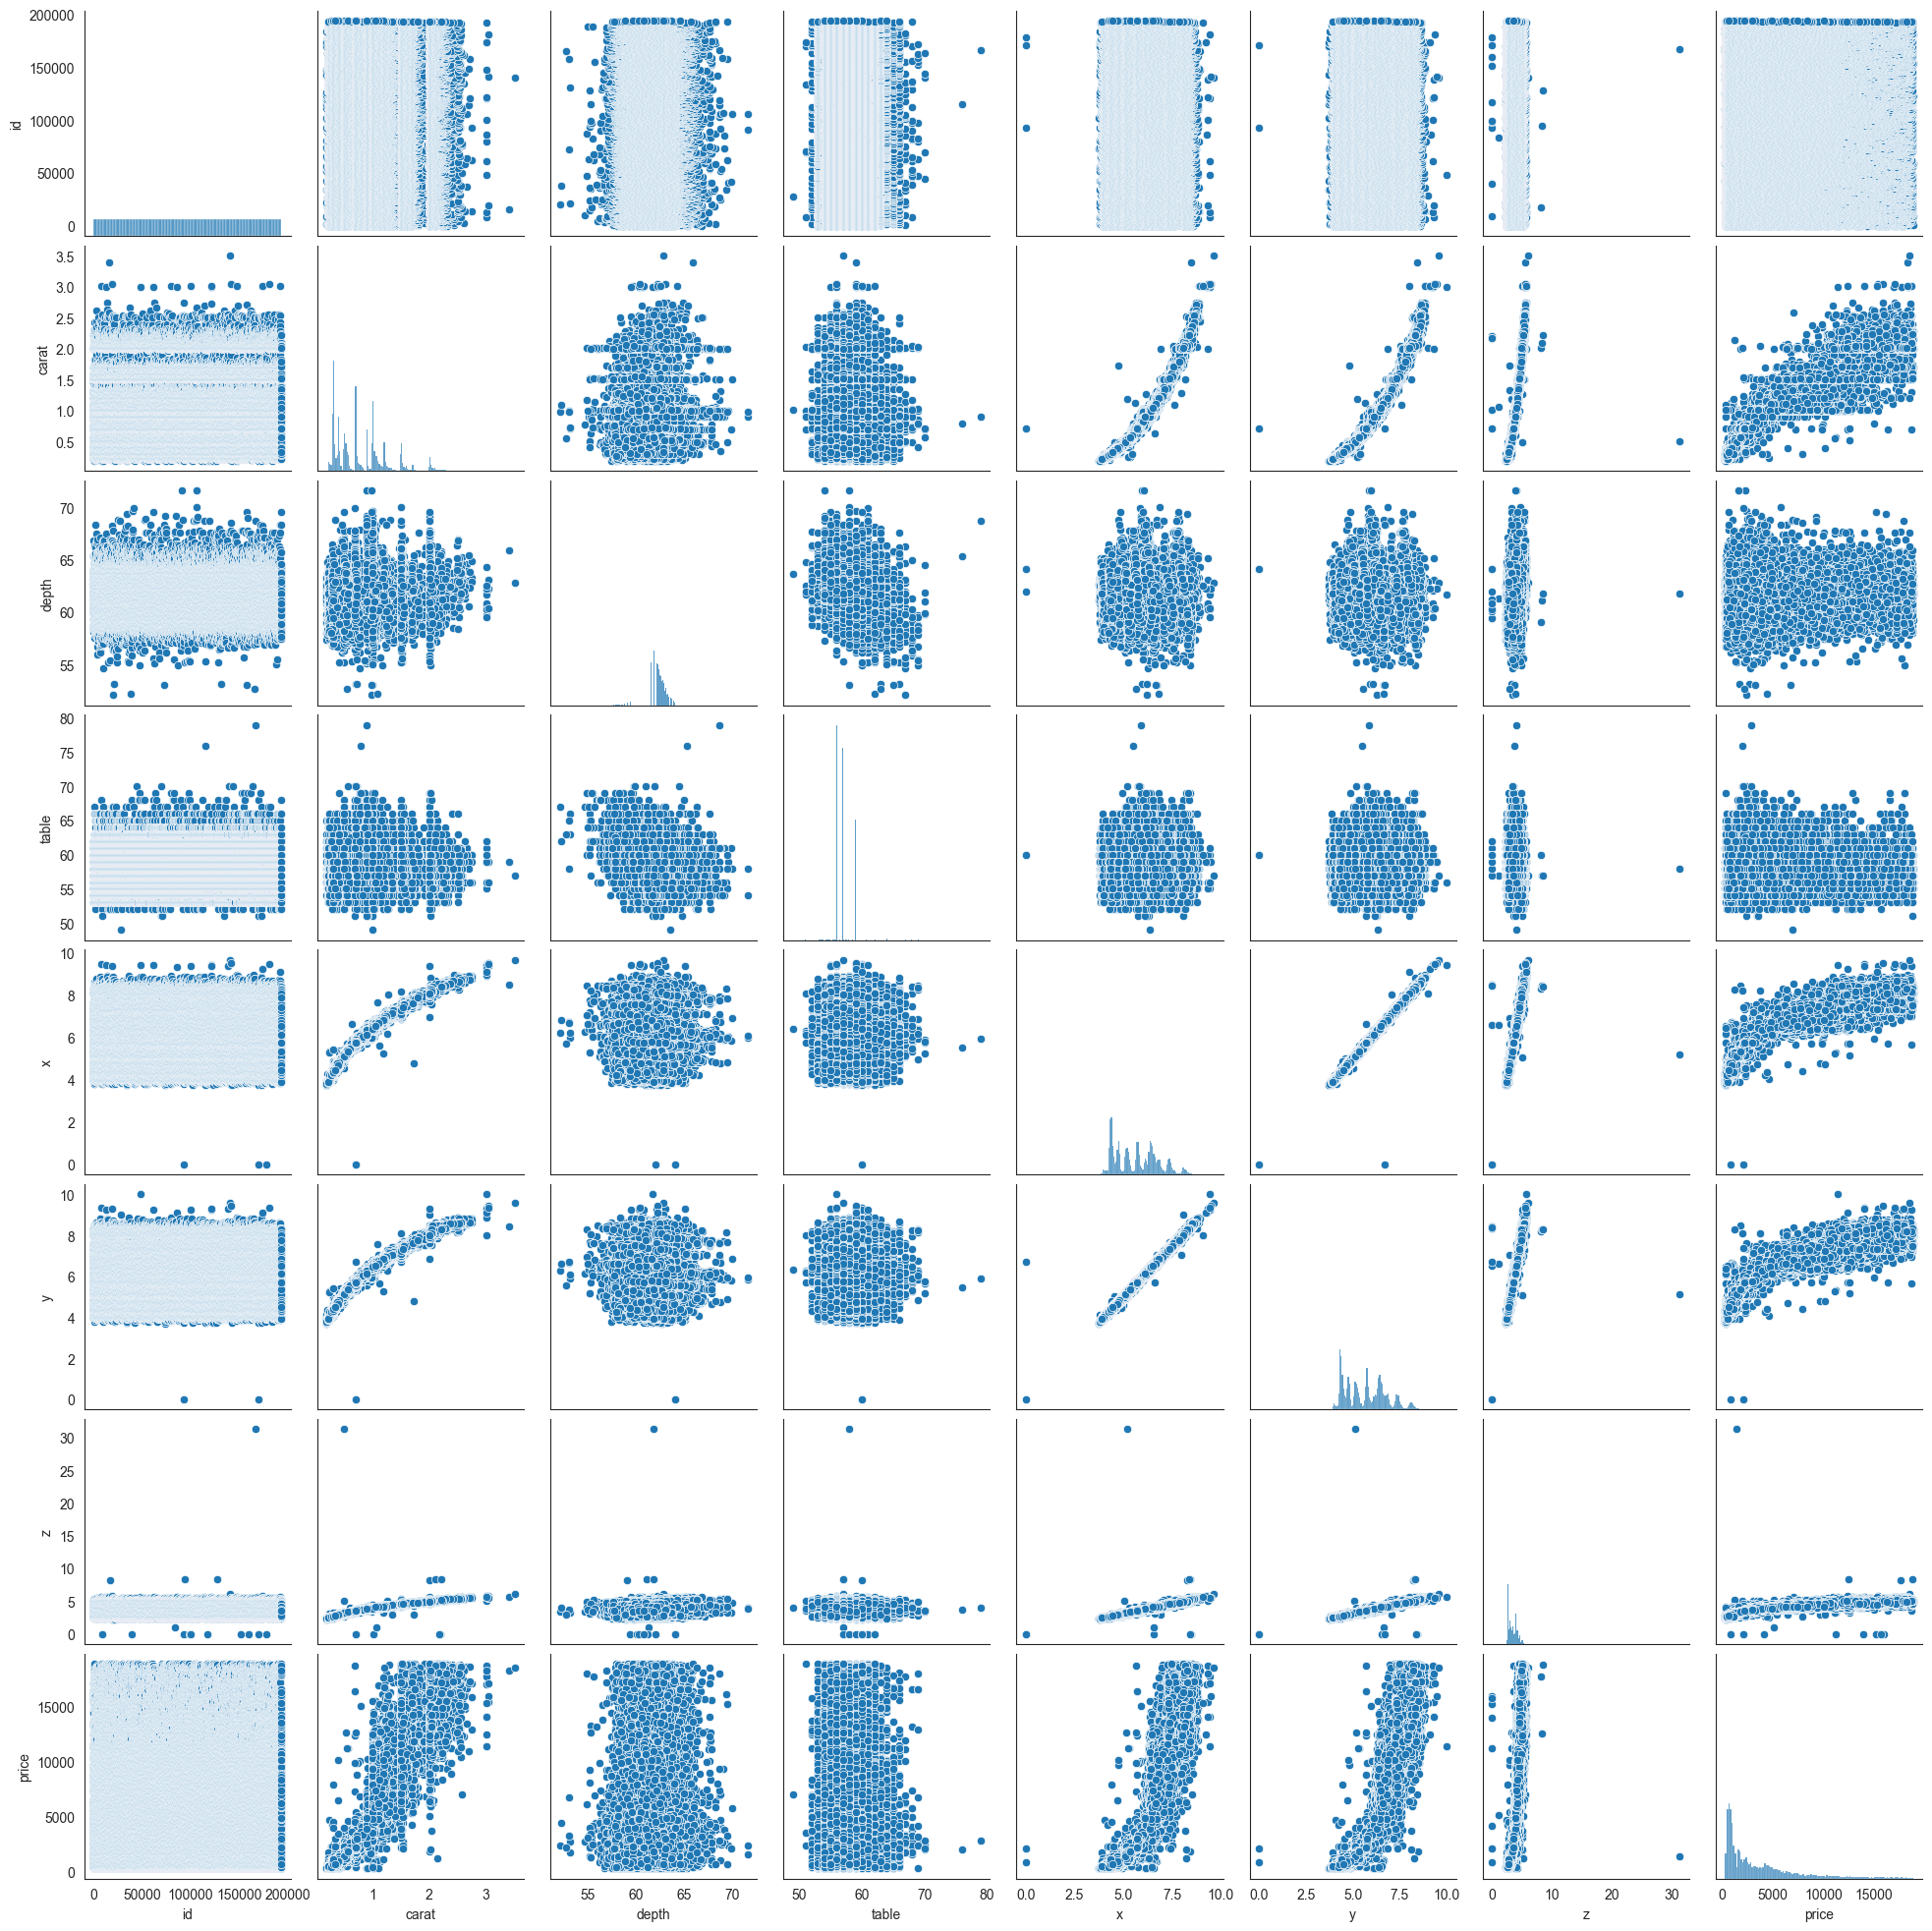

In [ ]:
plt.figure(figsize=(30,25))
sns.pairplot(df)
plt.show()

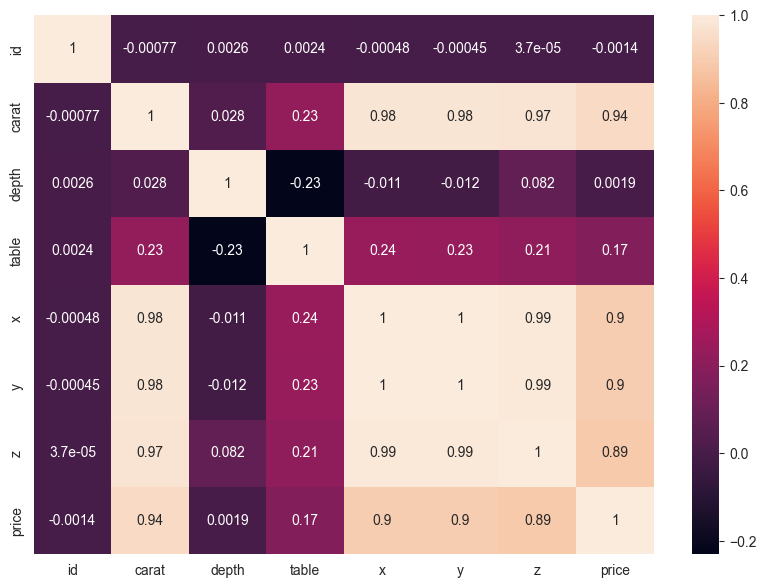

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numerical_features].corr(),  annot=True)
plt.show()